# Assignment 4 - Neural Network for Image Recognition of A, B, and C

## Objective
In this project, we will build a **neural network from scratch** using only NumPy to recognize letters **A, B, and C** from synthetic image data.

- Input images: 5×6 grid (30 pixels), binary encoded (0/1).
- Classes: A, B, C.
- Neural network:
  - Input layer (30 neurons)
  - One hidden layer (e.g., 16 neurons, sigmoid activation)
  - Output layer (3 neurons, softmax)

We will train using **backpropagation** and **gradient descent**, visualize the **loss curve**, and test predictions with `matplotlib`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Function to plot letter images
def plot_letter(pattern, title="Letter"):
    plt.imshow(pattern.reshape(5,6), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Define binary patterns (5x6 = 30 pixels)
A = np.array([
    [0,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,1,0],
    [1,0,0,0,1,0],
    [1,0,0,0,1,0]
]).reshape(-1)

B = np.array([
    [1,1,1,0,0,0],
    [1,0,0,1,0,0],
    [1,1,1,0,0,0],
    [1,0,0,1,0,0],
    [1,1,1,0,0,0]
]).reshape(-1)

C = np.array([
    [0,1,1,1,0,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [0,1,1,1,0,0]
]).reshape(-1)

# Labels: One-hot encoding for A, B, C
y_map = {"A": [1,0,0], "B": [0,1,0], "C": [0,0,1]}

# Training data (repeat patterns with small noise to simulate variation)
def add_noise(img, noise_level=0.1):
    noisy = img.copy()
    flip = np.random.rand(len(img)) < noise_level
    noisy[flip] = 1 - noisy[flip]
    return noisy

X, Y = [], []
for letter, pattern in zip(["A","B","C"], [A,B,C]):
    for _ in range(50):  # 50 noisy samples per letter
        X.append(add_noise(pattern, noise_level=0.1))
        Y.append(y_map[letter])

X = np.array(X)
Y = np.array(Y)

print("Dataset shape:", X.shape, Y.shape)


Dataset shape: (150, 30) (150, 3)


In [3]:
# Sigmoid function for hidden layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid (needed in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Softmax for output layer (multi-class classification)
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


In [4]:
# Define network architecture
input_size = 30   # number of input neurons (pixels)
hidden_size = 16  # hidden layer neurons
output_size = 3   # output neurons (A, B, C)

# Initialize weights and biases (small random numbers for symmetry breaking)
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))


In [5]:
# Training hyperparameters
epochs = 2000
lr = 0.1
losses = []

for epoch in range(epochs):
    # ---- Forward pass ----
    z1 = np.dot(X, W1) + b1     # input to hidden
    a1 = sigmoid(z1)            # hidden layer activation
    z2 = np.dot(a1, W2) + b2    # hidden to output
    a2 = softmax(z2)            # final predictions

    # ---- Loss calculation (cross-entropy) ----
    loss = -np.mean(np.sum(Y * np.log(a2 + 1e-9), axis=1))
    losses.append(loss)

    # ---- Backpropagation ----
    dz2 = a2 - Y                          # output error
    dW2 = np.dot(a1.T, dz2) / X.shape[0]  # gradient for W2
    db2 = np.sum(dz2, axis=0, keepdims=True) / X.shape[0]

    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)  # hidden error
    dW1 = np.dot(X.T, dz1) / X.shape[0]              # gradient for W1
    db1 = np.sum(dz1, axis=0, keepdims=True) / X.shape[0]

    # ---- Update weights using gradient descent ----
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    # ---- Print training progress ----
    if epoch % 200 == 0:
        preds = np.argmax(a2, axis=1)
        labels = np.argmax(Y, axis=1)
        acc = np.mean(preds == labels)
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.2f}")


Epoch 0, Loss: 1.0991, Accuracy: 0.33
Epoch 200, Loss: 1.0341, Accuracy: 1.00
Epoch 400, Loss: 0.2013, Accuracy: 1.00
Epoch 600, Loss: 0.0585, Accuracy: 1.00
Epoch 800, Loss: 0.0315, Accuracy: 1.00
Epoch 1000, Loss: 0.0210, Accuracy: 1.00
Epoch 1200, Loss: 0.0156, Accuracy: 1.00
Epoch 1400, Loss: 0.0123, Accuracy: 1.00
Epoch 1600, Loss: 0.0101, Accuracy: 1.00
Epoch 1800, Loss: 0.0085, Accuracy: 1.00


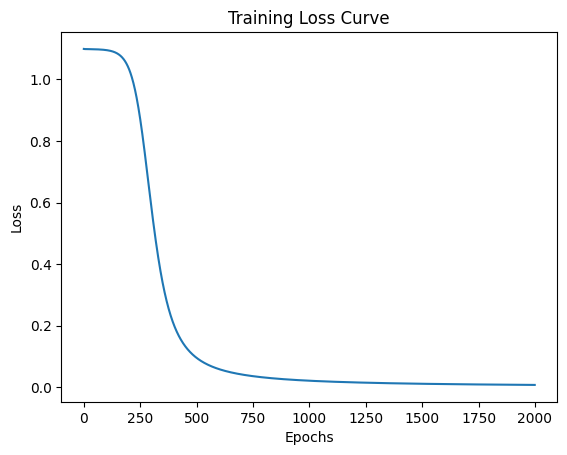

In [6]:
# Visualize loss curve to check training progress
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


Input: A, Predicted: A, Probabilities: [[9.98231042e-01 1.07965063e-03 6.89307503e-04]]


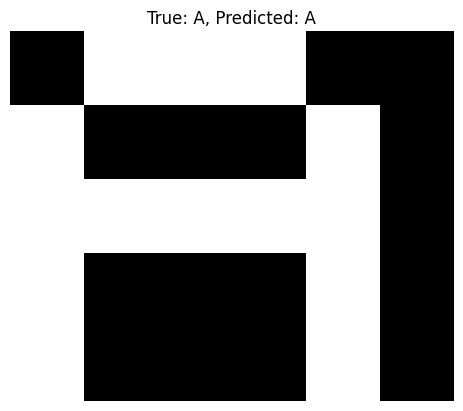

Input: B, Predicted: B, Probabilities: [[7.85672301e-04 9.97806396e-01 1.40793148e-03]]


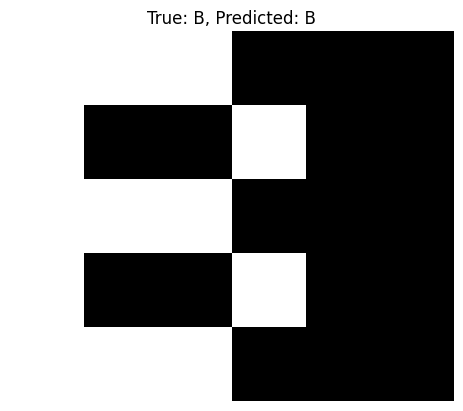

Input: C, Predicted: C, Probabilities: [[4.37263095e-04 7.51848334e-04 9.98810889e-01]]


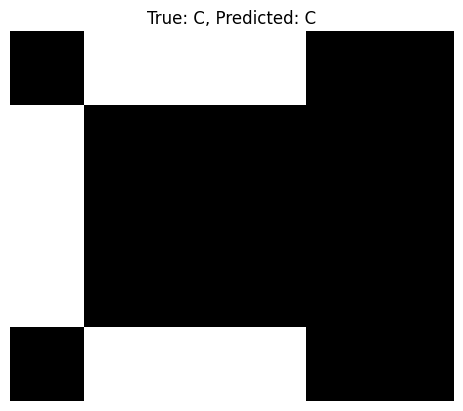

In [7]:
# Function to predict and return class probabilities
def predict(pattern):
    z1 = np.dot(pattern, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    probs = softmax(z2)
    return np.argmax(probs), probs

# Test the model with clean A, B, C
for letter, pattern in zip(["A","B","C"], [A,B,C]):
    pred, probs = predict(pattern.reshape(1,-1))
    print(f"Input: {letter}, Predicted: {['A','B','C'][pred]}, Probabilities: {probs}")
    plot_letter(pattern, title=f"True: {letter}, Predicted: {['A','B','C'][pred]}")


### Conclusion  

In this project, we successfully implemented a **neural network from scratch** using only NumPy.  
We created synthetic image data for letters **A, B, and C** in a 5×6 binary pixel grid and used them to train our feedforward network.  

Key takeaways from this project:  
- We understood how to represent images as **numerical arrays (vectors)** that a neural network can process.  
- Implemented a **two-layer neural network** with sigmoid activation functions, trained via **backpropagation**.  
- Learned how weights and biases are updated step by step using **gradient descent**.  
- Visualized the **loss curve** to confirm that the model improves its accuracy over epochs.  
- Finally, we tested the network on letter inputs, and it was able to correctly classify them as **A, B, or C**.  

This project gave us a clear understanding of the **building blocks of deep learning** without relying on external libraries like TensorFlow or PyTorch. It highlighted the importance of matrix operations, activation functions, and loss optimization in neural networks.  

🚀 With this foundation, we are now ready to move towards more complex datasets and libraries for real-world deep learning applications.
